# Step 3: choose & load image

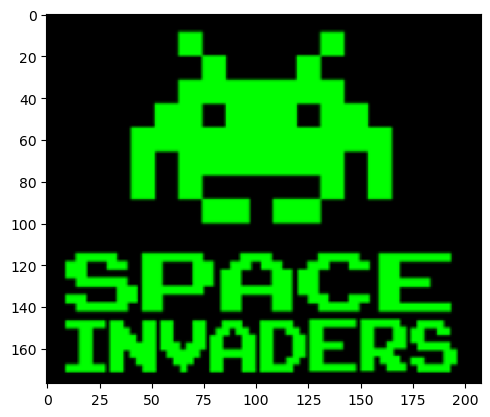

(177, 208, 4)


In [7]:
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

loc_input_img = PIL.Image.open(os.path.join('..', 'data', 'input', 'image_raw.png'))
img = np.array(loc_input_img)
plt.imshow(img)
plt.show()
print(img.shape)

# Step 5: Generalize manipulations

Function 1: Image multiplication

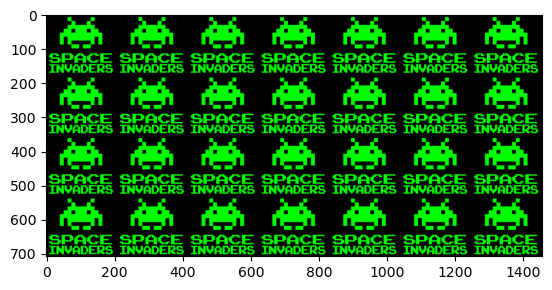

In [8]:
image = img.copy()

# Determine rows and columns of final image. Function in this block can be done with any number of rows and columns if performance permits
rows = 4 # int(input())
columns = 7 # int(input())

# Create array
def image_multiplication(image):
    
    # Reserve row space for better performance, based on height and with of original image
    img_height, img_width, img_colour = np.shape(image)
    img_temporary_row = np.zeros([img_height,img_width*columns,img_colour])
    img_array = np.zeros([img_height*rows,img_width*columns,img_colour])
        
    # Loop through array: first create rows where images will be added one by one
    for i in range(rows):  
        for j in range(columns):
            img_temporary_row[0:len(img_temporary_row[:,0:0]) , j*img_width:(j+1)*img_width] = image
        # Add each row to array
        img_array [ i*len(img_temporary_row[:,0:0]):(i+1)*len(img_temporary_row[:,0:0])  , 0:img_width*columns  ] = img_temporary_row
        
    plt.imshow(img_array.astype(np.uint8)) # cast as uint8 to avoid feature warning of plt

result = image_multiplication(image)

Function 2: grid with flips

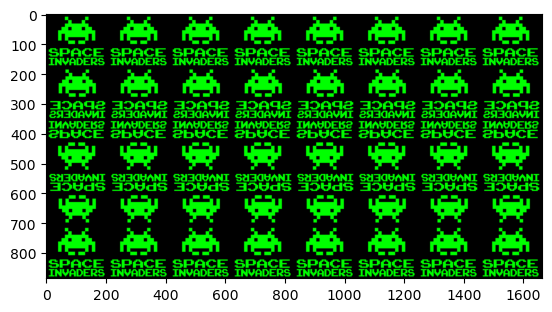

In [9]:
image = img.copy()

# Determine rows and columns of final image
rows = 5 # int(input())
columns = 8 # int(input())

img_height, img_width, img_colour = np.shape(image)

# Make matrix with same values per row
def matrix_builder(x):
    matrix = np.zeros([0, columns])
    for i in range(rows):
        newrow = np.full((1,columns), i)
        matrix = np.concatenate([matrix, newrow], axis = 0)
    return matrix

# Flip images in different ways
def flip_mirror(image):
    return np.fliplr(image)
def flip_upside_down(image):
    return np.flipud(image)
def flip_mirror_upside_down(image):
    return np.flipud(np.fliplr(image))

# Create array with flipped images
def grid_with_flips(image, matrix):
    
    matrix = matrix_builder(matrix)    
    
    # Reserve row space for better performance, based on height and with of original image
    img_rows, img_columns, img_colour = np.shape(image)
    img_temporary_row = np.zeros([img_height,img_width*columns,img_colour])
    img_array = np.zeros([img_height*rows,img_width*columns,img_colour])
    
    # Each value of matrix correspondents with flip mode in function grid_with_flips
    for i in range(rows):  
        for j in range(columns):
            if int(matrix[i][j]) == 0 or int(matrix[i][j]) > 3:
                img_temporary_row[0:len(img_temporary_row[:,0:0]) , j*img_columns:(j+1)*img_width] = image
            if int(matrix[i][j]) == 1:
                image1 = flip_mirror(image)
                img_temporary_row[0:len(img_temporary_row[:,0:0]) , j*img_columns:(j+1)*img_width] = image1
            elif int(matrix[i][j]) == 2:
                image2 = flip_upside_down(image)
                img_temporary_row[0:len(img_temporary_row[:,0:0]) , j*img_columns:(j+1)*img_width] = image2
            elif int(matrix[i][j]) == 3:
                image3 = flip_mirror_upside_down(image)
                img_temporary_row[0:len(img_temporary_row[:,0:0]) , j*img_columns:(j+1)*img_width] = image3
            else:
                img_temporary_row = img_temporary_row
        
        # Add each row vertically to array
        new_row = img_temporary_row.copy()
        img_array [ i*len(new_row[:,0:0]):(i+1)*len(new_row[:,0:0])  , 0:img_width*columns  ] = new_row
        
    plt.imshow(img_array.astype(np.uint8)) # cast as uint8 to avoid feature warning of plt

matrix = matrix_builder(0)
result = grid_with_flips(image, matrix)

Function 3: colourful grid (grid is created following a list of colours, the big image in the center is mirrored)

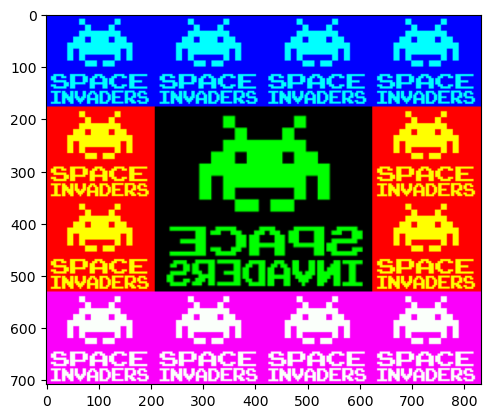

In [10]:
colours = ['b', 'b', 'b', 'b', 'y', 'y', 'p', 'p', 'p', 'p', 'y', 'y', '0', '0', '0', '0']

image = img.copy()
img_height, img_width, img_colour = np.shape(image)

def create_colourful_images(img):
    img_blue = img.copy()
    img_blue[:,:,[2,3]] = 255
    
    img_yellow = img.copy()
    img_yellow[:,:,[0,3]] = 255
    
    img_pink = img.copy()
    img_pink[:,:,[0,2]] = 250

    return[img_blue, img_yellow, img_pink]

def create_colourful_big_one(colours):
    # Use function create_colourful_images to get coloured images. Result colour depends on original colour of image
    img_colourful = create_colourful_images(image)
    img_blue, img_yellow, img_pink = img_colourful

    # Enlarge original image, while mirroring the image
    img_large = img.copy()
    img_large = flip_mirror(img_large.repeat(2, axis=0).repeat(2, axis=1))
    
    # Create empty subimages, for sake of performance
    img_toprow = img_sidecolumns = img_bottomrow = np.empty(np.shape(image)) # e.g.([177,208,4])

    # Images get a colour according the colours-list 
    for i in range(len(colours)):
        if colours[i] == 'b':
            img_toprow = np.concatenate([img_toprow, img_blue], axis = 1)
        elif colours[i] == 'y':
            img_sidecolumns = np.concatenate([img_sidecolumns, img_yellow], axis = 0)
        elif colours[i] =='p':
            img_bottomrow = np.concatenate([img_bottomrow, img_pink], axis = 1)
        else:
            break #img_row = np.concatenate([img_row, img_large], axis = 1)
    
    # Get rid of leading and trailing empty/zeros spaces, created before concatenation
    img_toprow = img_toprow[:,img_width:]
    img_bottomrow = img_bottomrow[:,img_width:]
    img_sidecolumns = img_sidecolumns[img_height:-img_height*2,:] 
    
    # Wrap in one array
    img_full = np.concatenate([ img_sidecolumns , img_large, img_sidecolumns ], axis=1)
    img_full = np.concatenate([ img_toprow , img_full, img_bottomrow], axis=0)
    
    plt.imshow(img_full.astype(np.uint8)) # cast as uint8 to get rid of feature warning of plt
        
result = create_colourful_big_one(colours)


# Step 6: Your own manipulations

Extra manipulation 1: Grid with degrading colours (colours degrade from top left to bottom right)

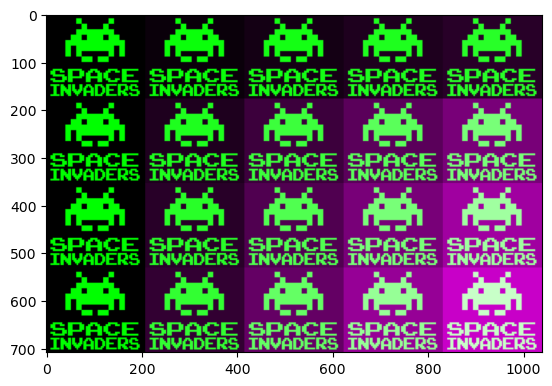

In [11]:
rows = 4
columns = 5
image = img.copy()
img_height, img_width, img_colour = np.shape(img)

# Function to make matrix with same values per row
def matrix_builder(x):
    matrix = np.zeros([0, columns])
    for i in range(rows):
        newrow = np.full((1,columns), i)
        matrix = np.concatenate([matrix, newrow], axis = 0)
    return matrix

# Degrade colours by changing colour code while looping through rows and columns
def degrading_colours(img, matrix):
    # use function matrix_builder to make matrix
    matrix = matrix_builder(matrix)    
    
    # Reserve row space for better performance
    img_temporary_row = np.zeros([img_height,img_width*columns,img_colour])
    img_array = np.zeros([img_height*rows,img_width*columns,img_colour])
    
    # Each value of matrix correspondents with flip mode in function grid_with_flips
    for i in range(rows):  
        # For each cell per row, the colour code changes while looping
        for j in range(columns):
            if int(matrix[i][j]) == 0:
                image[:,:,[0,2]] = j*10               
                img_temporary_row[0:len(img_temporary_row[:,0:0]) , j*img_width:(j+1)*img_width] = img
            if int(matrix[i][j]) == 1:
                image[:,:,[0,2]] = j*30
                img_temporary_row[0:len(img_temporary_row[:,0:0]) , j*img_width:(j+1)*img_width] = img
            elif int(matrix[i][j]) == 2:
                image[:,:,[0,2]] = j*40
                # image2 = np.flipud(np.fliplr(image))
                img_temporary_row[0:len(img_temporary_row[:,0:0]) , j*img_width:(j+1)*img_width] = img
            elif int(matrix[i][j]) == 3:
                image[:,:,[0,2]] = j*50
                img_temporary_row[0:len(img_temporary_row[:,0:0]) , j*img_width:(j+1)*img_width] = img
            else:
                img_temporary_row = img_temporary_row
        
        # Add each row vertically to array  
        new_row = img_temporary_row.copy()
        img_array [ i*len(new_row[:,0:0]):(i+1)*len(new_row[:,0:0])  , 0:img_width*columns ] = new_row
        
    plt.imshow(img_array.astype(np.uint8)) # cast as uint8 to avoid feature warning of plt

# Function grid_with_flips applied to image, with input from matrix 
matrix = matrix_builder(0)
result = degrading_colours(image, matrix)

Extra manipulation 2: Blurrer

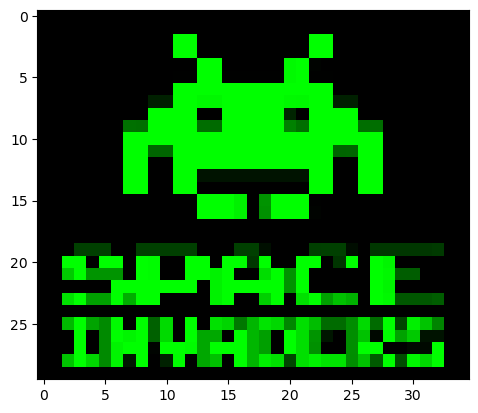

In [12]:
image = img.copy()
blurdegree = 6 # int(input('Enter a blur degree between 2 and 50:'))

def blurrer(image):
    plt.imshow(image[::blurdegree, ::blurdegree, :])
    plt.show()

result = blurrer(image)